In [1]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout
from tensorflow.keras.layers import LeakyReLU
from sklearn.utils import shuffle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.utils import to_categorical

In [2]:
import csv
csvFile = []
data = []
with open('preprocessed_data.csv', mode ='r', encoding = 'UTF-8') as file:     
    csvFile = csv.reader(file) 
    count = 0
    for line in csvFile:
        if count != 0:
            data.append(line)
        count+=1
data = np.array(data)
data = np.float32(data)

dataDf = pd.DataFrame(data, columns = ['price','space', 'rooms', 'bedrooms', 'furniture', 'latitude', 'longitude'])
features = ['space', 'rooms']
# target = dataDf.loc[:, ['price']].values
feats = dataDf.loc[:, features].values
feats = StandardScaler().fit_transform(feats)
price = dataDf['price']

model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='relu'))
model.summary()
# print(model)
# compile the keras model


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 6         
                                                                 
 dense_1 (Dense)             (None, 12)                36        
                                                                 
 dense_2 (Dense)             (None, 20)                260       
                                                                 
 dense_3 (Dense)             (None, 40)                840       
                                                                 
 dense_4 (Dense)             (None, 10)                410       
                                                                 
 dense_5 (Dense)             (None, 2)                 22        
                                                                 
 dense_6 (Dense)             (None, 1)                 3

In [17]:
tf.keras.backend.set_epsilon(1)
model.compile(loss=tf.keras.losses.mean_squared_logarithmic_error, optimizer='adam', metrics=['mape'])
# fit the keras model on the dataset
history = model.fit(feats, price, epochs=50, batch_size=10)
# evaluate the keras model
accuracy = model.evaluate(feats, price)
print(feats)

Epoch 1/50
4035/4035 [==============================] - 8s 2ms/step - loss: 7.9264 - mape: 57.9700
Epoch 2/50
4035/4035 [==============================] - 7s 2ms/step - loss: 0.1521 - mape: 32.9727
Epoch 3/50
4035/4035 [==============================] - 7s 2ms/step - loss: 0.1408 - mape: 31.5907
Epoch 4/50
4035/4035 [==============================] - 7s 2ms/step - loss: 0.1395 - mape: 31.4019
Epoch 5/50
4035/4035 [==============================] - 7s 2ms/step - loss: 0.1389 - mape: 31.3315
Epoch 6/50
4035/4035 [==============================] - 7s 2ms/step - loss: 0.1385 - mape: 31.2486
Epoch 7/50
4035/4035 [==============================] - 7s 2ms/step - loss: 0.1384 - mape: 31.2205
Epoch 8/50
4035/4035 [==============================] - 7s 2ms/step - loss: 0.1383 - mape: 31.1668
Epoch 9/50
4035/4035 [==============================] - 7s 2ms/step - loss: 0.1382 - mape: 31.1645
Epoch 10/50
4035/4035 [==============================] - 7s 2ms/step - loss: 0.1381 - mape: 31.1470
Epoch 11/

dict_keys(['loss', 'mape'])


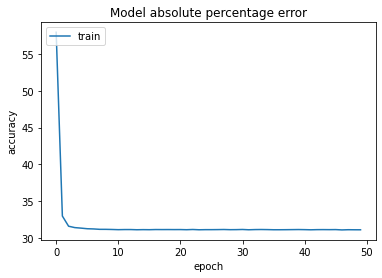

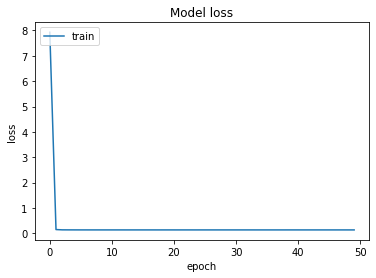

In [20]:
print(history.history.keys())

# summarize history for accuracy and loss
plt.plot(history.history['mape'])
plt.title('Model absolute percentage error')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()